When the car is in the same position of the reference trajectory the steer must be maintained to let the car turning

In [105]:
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pickle

In [3]:
ref = pd.read_csv('../demonstrations/extracted_features/ref_traj.csv')

In [3]:
def delta_yaw(r, c):
    if c < - (np.pi / 2) and r > 0:
        c = c + 2 * np.pi
    if r < - (np.pi / 2) and c > 0:
        r = r + 2 * np.pi
    return r - c

In [15]:
y = ref['Steer'].values[10:].reshape(-1, 1)

In [16]:
x_df = pd.concat([ref['yaw'].shift(10), ref['yaw']], axis=1)

In [17]:
x_df.columns = ['next', 'prev']
x_df = x_df[10:]

In [26]:
x_df.apply(lambda x: delta_yaw(x['next'], x['prev']), axis=1)

10      0.004298
11      0.004132
12      0.003940
13      0.003721
14      0.003466
          ...   
7195    0.009995
7196    0.009929
7197    0.009864
7198    0.009810
7199    0.009761
Length: 7190, dtype: float64

In [32]:
#x = (ref['yaw'].shift(10) - ref['yaw']).values[10:].reshape(-1, 1)
#x = x_df.apply(lambda x: delta_yaw(x['next'], x['prev']), axis=1).values.reshape(-1, 1)
x = ref['yaw'].values[15:] - ref['yaw'].values[:-15]

In [33]:
strange_ids = [i for i, v in enumerate(x) if abs(v) > 1]

In [34]:
strange_ids

[3162,
 3163,
 3164,
 3165,
 3166,
 3167,
 3168,
 3169,
 3170,
 3171,
 3172,
 3173,
 3174,
 3175,
 3176,
 4690,
 4691,
 4692,
 4693,
 4694,
 4695,
 4696,
 4697,
 4698,
 4699,
 4700,
 4701,
 4702,
 4703,
 4704,
 4722,
 4723,
 4724,
 4725,
 4726,
 4727,
 4728,
 4729,
 4730,
 4731,
 4732,
 4733,
 4734,
 4735,
 4736,
 5145,
 5146,
 5147,
 5148,
 5149,
 5150,
 5151,
 5152,
 5153,
 5154,
 5155,
 5156,
 5157,
 5158,
 5159,
 5537,
 5538,
 5539,
 5540,
 5541,
 5542,
 5543,
 5544,
 5545,
 5546,
 5547,
 5548,
 5549,
 5550,
 5551,
 5915,
 5916,
 5917,
 5918,
 5919,
 5920,
 5921,
 5922,
 5923,
 5924,
 5925,
 5926,
 5927,
 5928,
 5929,
 6000,
 6001,
 6002,
 6003,
 6004,
 6005,
 6006,
 6007,
 6008,
 6009,
 6010,
 6011,
 6012,
 6013,
 6014]

In [35]:
y = y[:2990]
x = x[:2990]

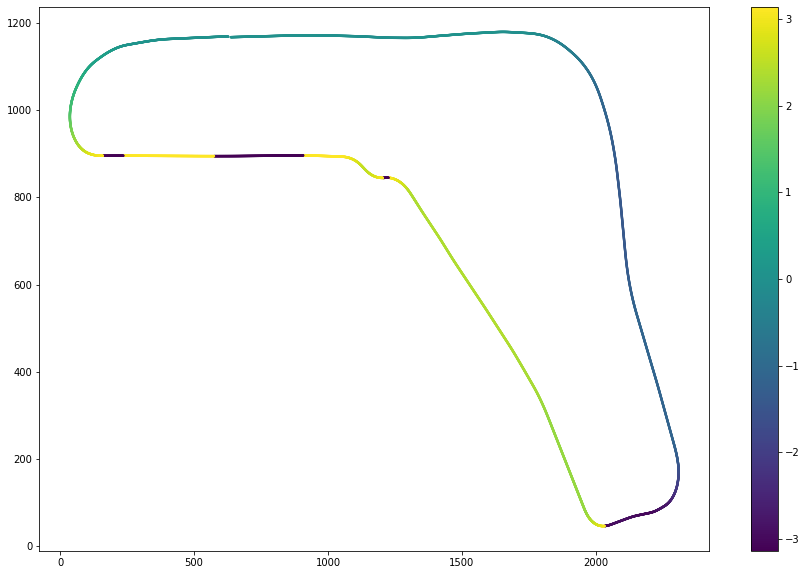

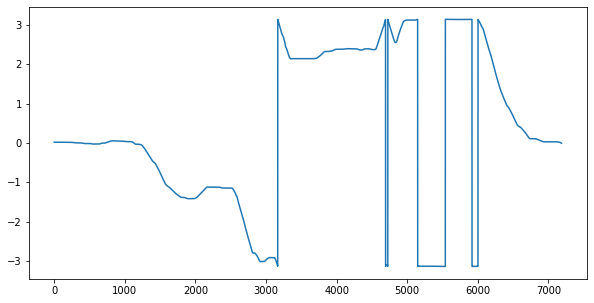

In [33]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.scatter(ref['xCarWorld'].values[10:], ref['yCarWorld'].values[10:], s=2, c=ref['yaw'].values[10:])
plt.colorbar()

plt.figure(figsize=(10,5))
plt.plot(ref['yaw'].values[10:])

In [12]:
ref['xCarWorld'].values[10:3000].shape

(2990,)

In [13]:
x.shape

(3000, 1)

Text(0, 0.5, 'Steer')

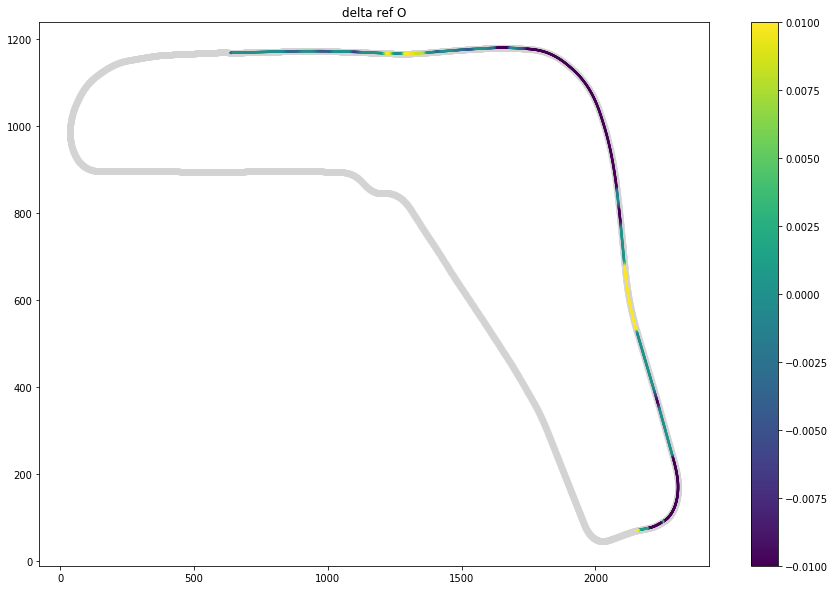

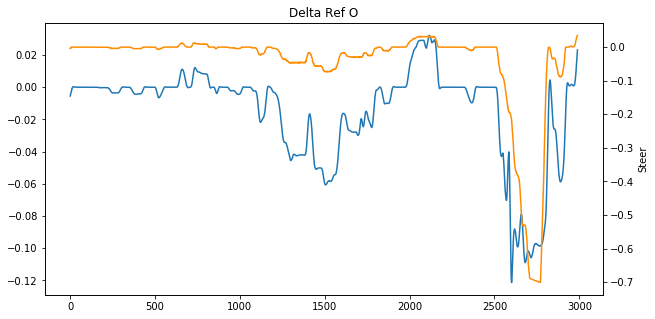

In [41]:
plt.figure(figsize=(15,10))
plt.scatter(ref['xCarWorld'], ref['yCarWorld'], c='lightgray', alpha=0.1)
plt.scatter(ref['xCarWorld'].values[10:3000],
            ref['yCarWorld'].values[10:3000], s=2, c=x.ravel(), vmin=-0.01, vmax=0.01)
plt.title('delta ref O')
plt.colorbar()

plt.figure(figsize=(10,5))
plt.plot(x);
plt.title('Delta Ref O')
ax = plt.gca()
ax2 = ax.twinx()
#plt.figure(figsize=(10,5))
ax2.plot(ref['Steer'].values[10:3000], 'darkorange')
#plt.title('Steer');
ax2.set_ylabel('Steer')

In [37]:
ref.columns

Index(['curLapTime', 'Dist', 'Acceleration_x', 'Acceleration_y', 'Gear', 'rpm',
       'speed_x', 'speed_y', 'speed_z', 'dist_to_middle', 'xCarWorld',
       'yCarWorld', 'z', 'roll', 'pitch', 'yaw', 'speedGlobalX',
       'speedGlobalY', 'Steer', 'Throttle', 'Brake', 'NLap', 'is_partial',
       'isReference', 'trackPos'],
      dtype='object')

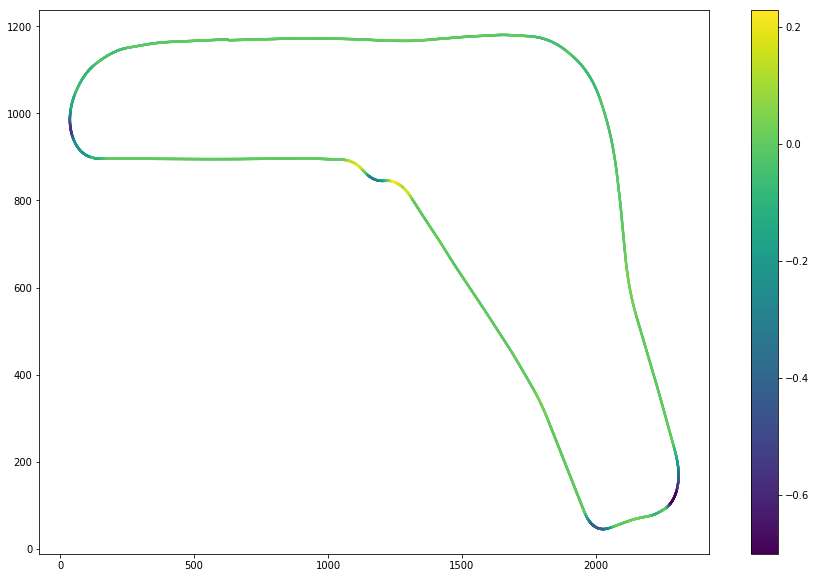

In [63]:
plt.figure(figsize=(15,10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c=ref['Steer'].values[1:])
plt.colorbar()

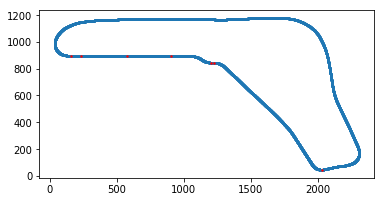

In [95]:
plt.figure(figsize=(10,10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2)
plt.scatter(ref['xCarWorld'].values[1:][strange_ids], ref['yCarWorld'].values[1:][strange_ids], s=2, c='r')
plt.gca().set_aspect('equal')

(-0.02, 0.02)

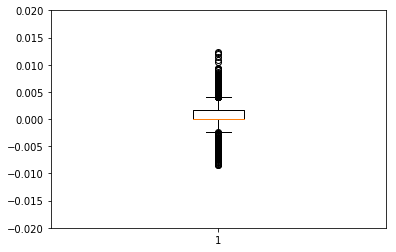

In [64]:
plt.boxplot(x.reshape(-1, 1));
plt.ylim([-0.02,0.02])

In [65]:
y.shape

(7199, 1)

In [69]:
x.shape

(7199, 1)

In [44]:
x_data.shape

(2989,)

In [45]:
y_data.shape

(2989, 1)

In [46]:
x_data = x.copy()
x_data = x_data[1:].reshape(-1, 1)
y_data = y.copy()
y_data = y_data[1:] - y_data[:-1]

data = pd.DataFrame(np.concatenate([x_data, y_data], axis=1), columns=['x', 'y'])

In [47]:
data = data.sample(frac=1)

In [48]:
x = data['x'].values.reshape(-1, 1)
y = data['y'].values.reshape(-1, 1)

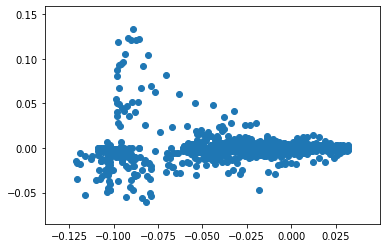

In [50]:
plt.scatter(x, np.arctanh(4*y));

In [51]:
np.sqrt(
    -cross_val_score(LinearRegression(fit_intercept=False), x, np.arctanh(4*y), cv=10,
                     scoring='neg_mean_squared_error'))

array([0.01450036, 0.00792469, 0.01304298, 0.00613619, 0.01248216,
       0.00809367, 0.00945133, 0.00863773, 0.01309092, 0.00901889])

In [52]:
lm = LinearRegression(fit_intercept=False).fit(x, np.arctanh(4*y))

In [53]:
lm.coef_

array([[-0.00551897]])

In [16]:
traj = pd.read_csv('../demonstrations/forza_ow2020_3_23.csv')

In [17]:
traj.columns

Index(['time', 'Dist', 'Ax', 'Ay', 'Gear', 'rpm', 'Speed_x', 'Speed_y',
       'Speed_z', 'trk_to_middle', 'trk_width', 'X', 'Y', 'Z', 'roll', 'pitch',
       'yaw', 'speedGlobalX', 'speedGlobalY', 'angle', 'track_angle', 'Steer',
       'Throttle', 'Brake'],
      dtype='object')

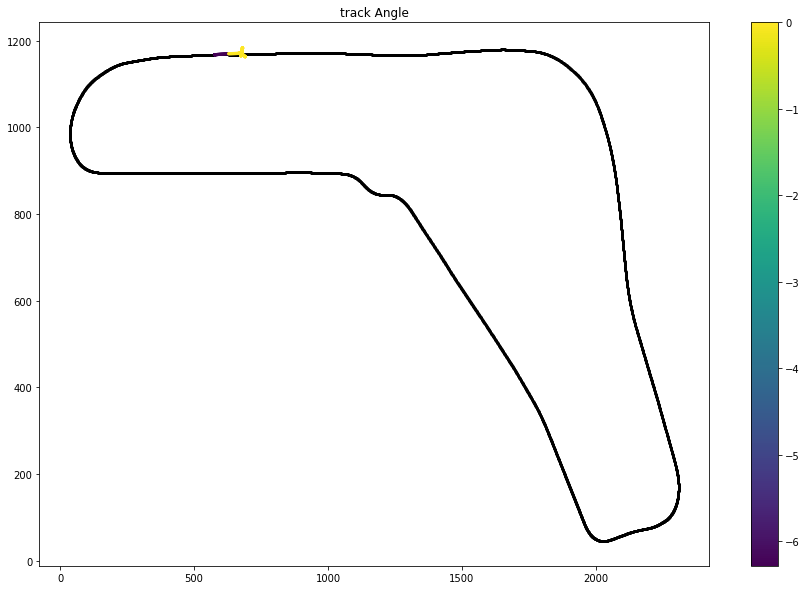

In [19]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c='k')
plt.scatter(traj['X'], traj['Y'], s=5, c=traj['track_angle'])
plt.colorbar();
plt.title('track Angle');

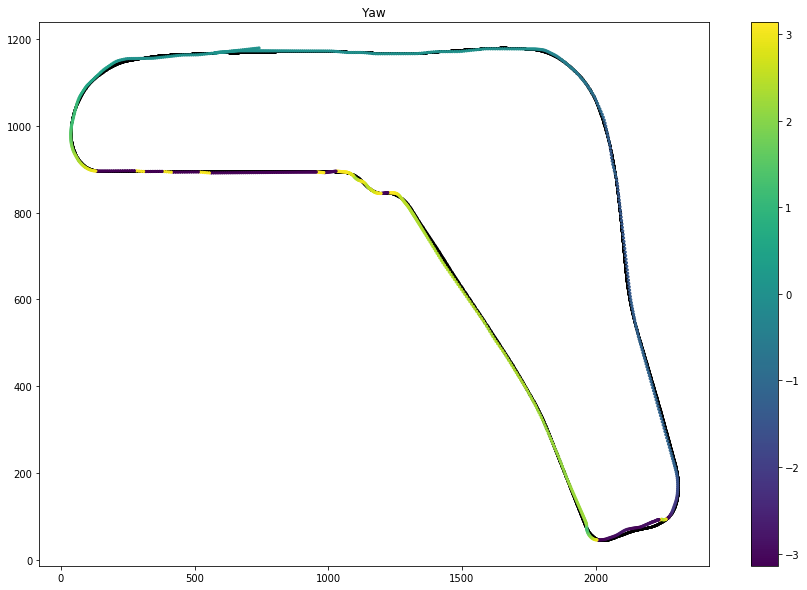

In [145]:
plt.figure(figsize=(15, 10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c='k')
plt.scatter(traj['X'], traj['Y'], s=5, c=traj['yaw'])
plt.colorbar();
plt.title('Yaw');

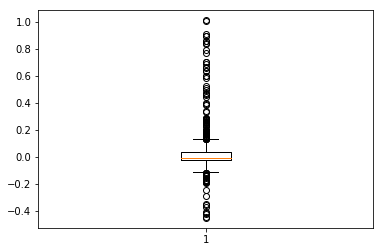

In [154]:
plt.boxplot(traj['angle'].values);

<IPython.core.display.Javascript object>


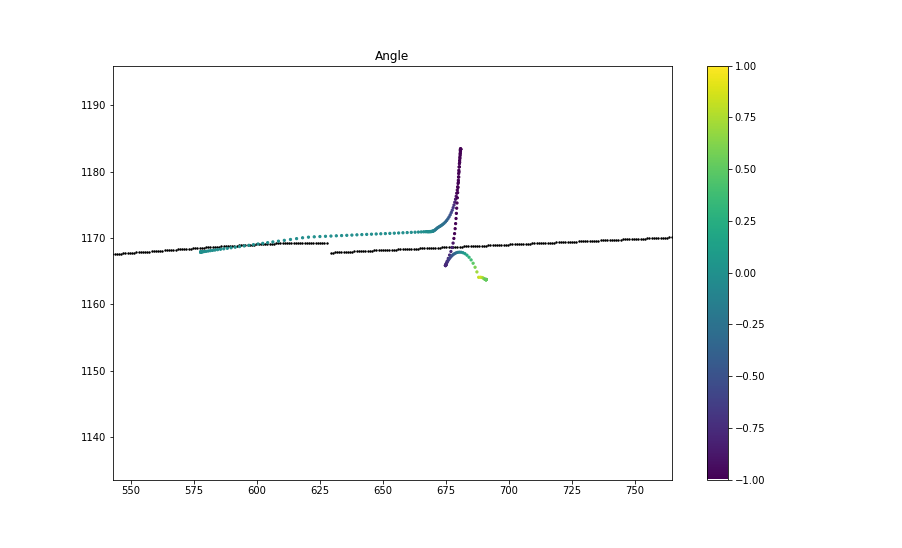

In [22]:
%matplotlib notebook
#plt.figure(figsize=(15, 10))
plt.figure()
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c='k')
plt.scatter(traj['X'], traj['Y'], s=5, c=traj['angle'], vmin=-1, vmax=1)
plt.colorbar();
plt.title('Angle');

<IPython.core.display.Javascript object>


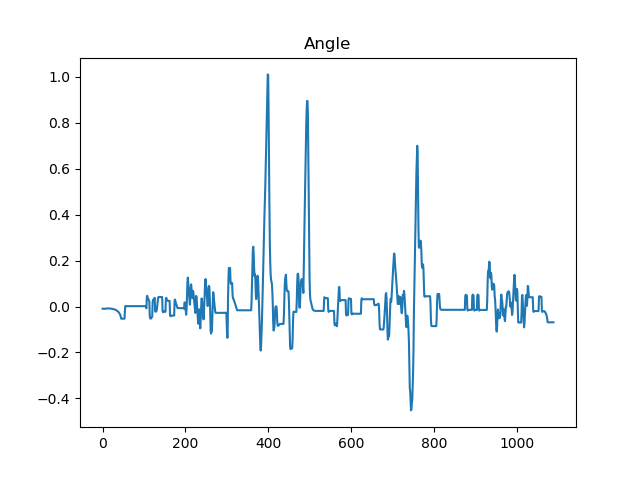

In [13]:
%matplotlib notebook
#plt.figure(figsize=(15, 10))
plt.figure()

plt.plot(traj['angle'])

plt.title('Angle');

In [155]:
ref.columns

Index(['curLapTime', 'Dist', 'Acceleration_x', 'Acceleration_y', 'Gear', 'rpm',
       'speed_x', 'speed_y', 'speed_z', 'dist_to_middle', 'xCarWorld',
       'yCarWorld', 'z', 'roll', 'pitch', 'yaw', 'speedGlobalX',
       'speedGlobalY', 'Steer', 'Throttle', 'Brake', 'NLap', 'is_partial',
       'isReference', 'trackPos'],
      dtype='object')

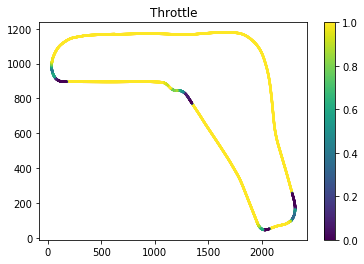

In [157]:
%matplotlib inline
#plt.figure(figsize=(15, 10))
plt.figure()
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2,c=ref['Throttle'].values[1:])
plt.colorbar();
plt.title('Throttle');

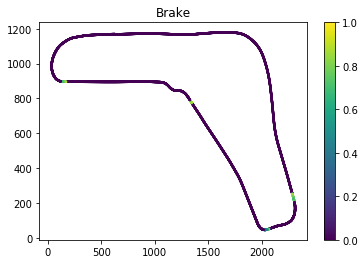

In [158]:
%matplotlib inline
#plt.figure(figsize=(15, 10))
plt.figure()
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2,c=ref['Brake'].values[1:])
plt.colorbar();
plt.title('Brake');

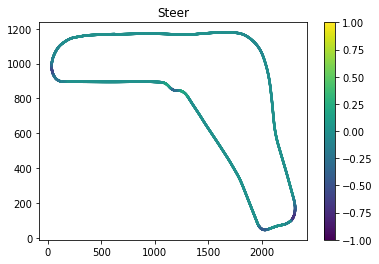

In [161]:
%matplotlib inline
#plt.figure(figsize=(15, 10))
plt.figure()
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c=ref['Steer'].values[1:], vmin=-1, vmax=1)
plt.colorbar();
plt.title('Steer');

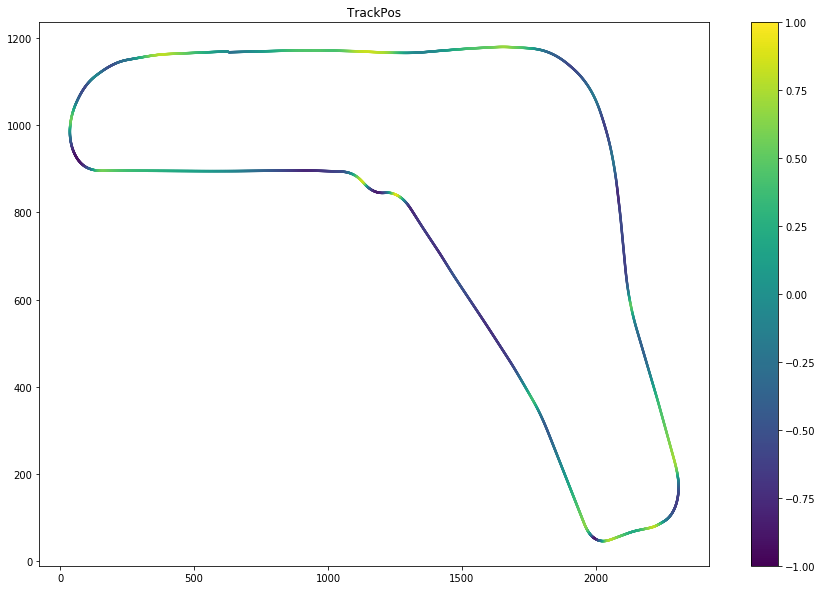

In [166]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c=ref['trackPos'].values[1:], vmin=-1, vmax=1)
plt.colorbar();
plt.title('TrackPos');

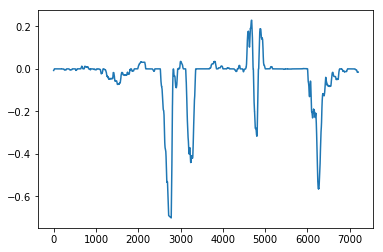

In [163]:
plt.plot(ref['Steer'].values[1:])

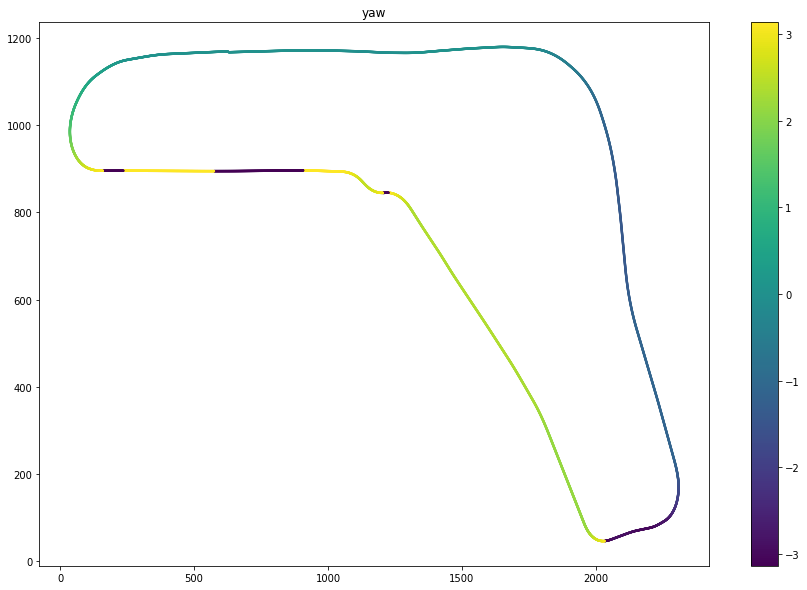

In [188]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2,c=ref['yaw'].values[1:])
plt.colorbar();
plt.title('yaw');

# Episode analysis

In [255]:
episode = pickle.load(open('../episode.pkl', 'rb'))
episode = [episode[i] for i in range(0, len(episode), 25)]

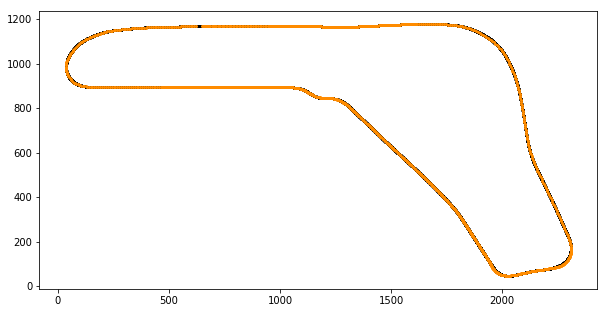

In [256]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(ref['xCarWorld'], ref['yCarWorld'], c='k', s=4)
plt.gca().set_aspect('equal');
for ob in episode:
    plt.scatter(ob['x'], ob['y'], c='darkorange', s=4)

In [219]:
def yaw_clip(x, y):
    res = []
    for i in range(x.shape[0]):
        x_ = x[i]
        y_ = y[i]
        if abs(x_) > np.pi/2 and abs(y_) > np.pi/2:
            if x_ < 0:
                x_ = 2*np.pi + x_
            if y_ < 0:
                y_ = 2*np.pi + y_
        res.append(x_ - y_)
    return np.array(res)

In [233]:
yaw_diff = ref['yaw'].values[20:] - ref['yaw'].values[:-20]
yaw_new = yaw_clip(ref['yaw'].values[20:], ref['yaw'].values[:-20])

In [251]:
div = (yaw_diff - yaw_new) > 1e-3

In [252]:
np.count_nonzero(div)

80

In [253]:
a = ref['yaw'].values[20:][div]
b = ref['yaw'].values[:-20][div]

In [249]:
-2.077836 - (-1.937917)

-0.13991900000000013

In [250]:
(-2.077836 + 2*np.pi) - (-1.937917 + 2*np.pi)

-0.1399189999999999

In [254]:
list(zip(a, b))

[(3.139889, -3.021462),
 (3.133026, -3.02637),
 (3.126212, -3.031371),
 (3.119457, -3.036446),
 (3.112768, -3.041607),
 (3.106145, -3.046941),
 (3.099595, -3.052494),
 (3.093123, -3.058222),
 (3.086732, -3.064095),
 (3.080429, -3.070093),
 (3.074229, -3.076214),
 (3.068112, -3.082516),
 (3.062048, -3.088988),
 (3.056019, -3.095586),
 (3.050017, -3.102273),
 (3.044034, -3.109017),
 (3.038101, -3.115792),
 (3.032223, -3.122622),
 (3.026355, -3.129503),
 (3.020476, -3.136404),
 (3.13831, -3.102002),
 (3.132012, -3.1015040000000003),
 (3.125495, -3.101551),
 (3.118852, -3.101887),
 (3.112129, -3.102355),
 (3.10535, -3.102865),
 (3.098557, -3.103369),
 (3.091788, -3.103872),
 (3.08508, -3.104394),
 (3.078475, -3.10505),
 (3.07194, -3.106012),
 (3.065467, -3.107419),
 (3.059059, -3.109383),
 (3.052723, -3.111927),
 (3.046507, -3.115046),
 (3.040377, -3.11879),
 (3.034314, -3.123141),
 (3.028306, -3.127992),
 (3.022343, -3.1332310000000003),
 (3.016454, -3.1388700000000003),
 (3.141564, -3.14

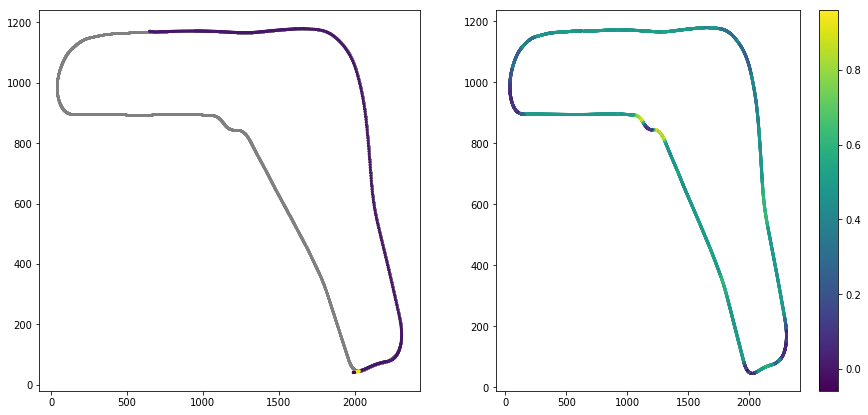

In [222]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in episode]
y = [ob['y'] for ob in episode]
s = [ob['delta_O'] for ob in episode]
p = ax1.scatter(x, y, c=s, s=4)
plt.colorbar(p);

#ax2.scatter(ref['xCarWorld'].values[20:], ref['yCarWorld'].values[20:],
#            c=ref['yaw'].values[20:] - ref['yaw'].values[:-20], s=4, vmin=-1, vmax=1)
ax2.scatter(ref['xCarWorld'].values[20:], ref['yCarWorld'].values[20:],
            c=yaw_clip(ref['yaw'].values[20:], ref['yaw'].values[:-20]), s=4)

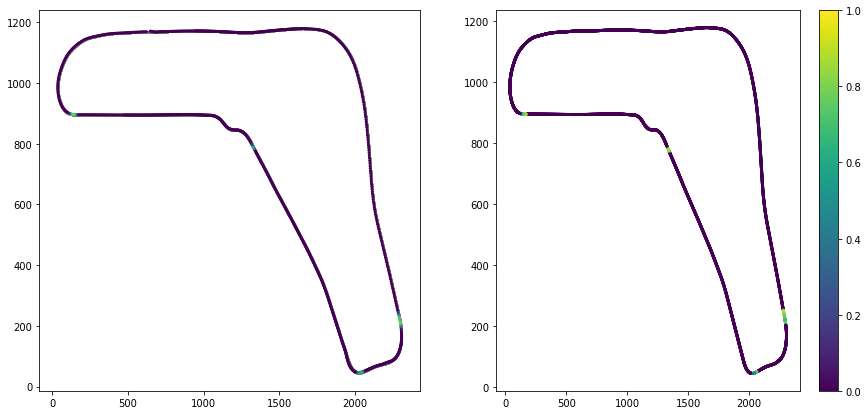

In [257]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in episode]
y = [ob['y'] for ob in episode]
s = [ob['brake'] for ob in episode]
p = ax1.scatter(x, y, c=s, s=4, vmin=0, vmax=1)
plt.colorbar(p);

ax2.scatter(ref['xCarWorld'], ref['yCarWorld'], c=ref['Brake'], s=4, vmin=0, vmax=1)

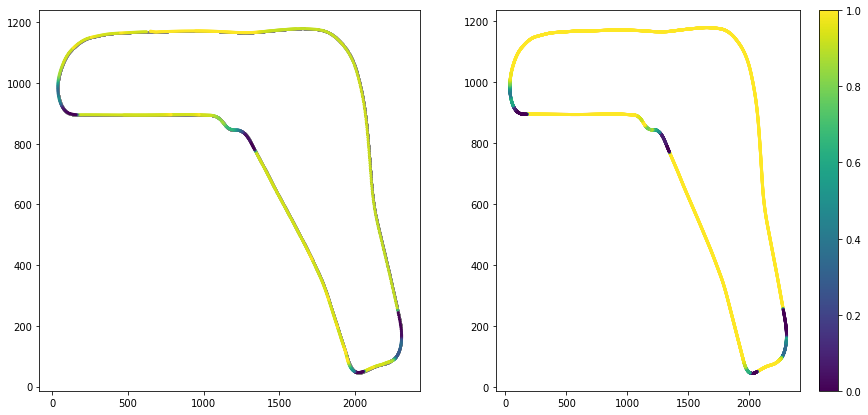

In [258]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in episode]
y = [ob['y'] for ob in episode]
s = [ob['throttle'] for ob in episode]
p = ax1.scatter(x, y, c=s, s=4, vmin=0, vmax=1)
plt.colorbar(p);

ax2.scatter(ref['xCarWorld'], ref['yCarWorld'], c=ref['Throttle'], s=4, vmin=0, vmax=1)

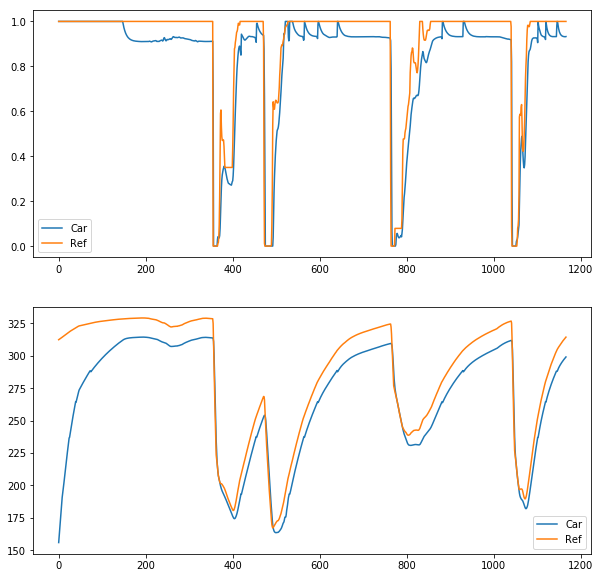

In [271]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot([ob['throttle'] for ob in episode], label='Car')
ax1.plot([ref['Throttle'][ob['ref_id']] for ob in episode], label='Ref')
ax1.legend()
ax2.plot([ob['speed_x'] for ob in episode], label='Car')
ax2.plot([ref['speed_x'][ob['ref_id']] for ob in episode], label='Ref')
ax2.legend()

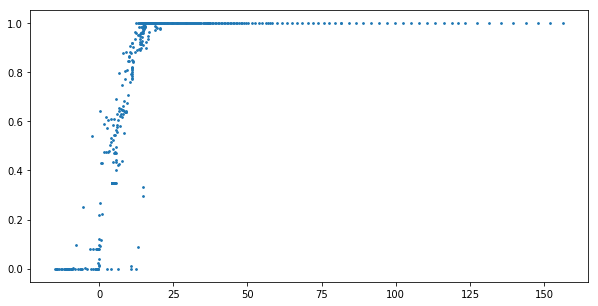

In [278]:
plt.figure(figsize=(10, 5))
plt.scatter([ob['vr'] - ob['v'] for ob in episode], [ref['Throttle'][ob['ref_id']] for ob in episode], s=3)

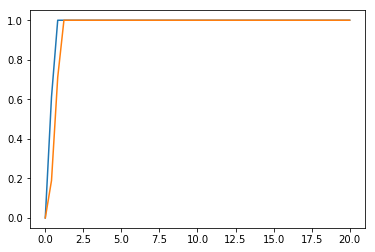

In [334]:
delta = np.linspace(0, 20)
plt.plot(delta, [max(0, min(1.5*d, 1)) for d in delta])
plt.plot(delta, [max(0, min(0.055*d + 1*d**2, 1)) for d in delta])
#plt.plot(delta, 1 - np.exp(-delta))
#plt.plot(delta, 1 - np.exp(-delta * 1.5))

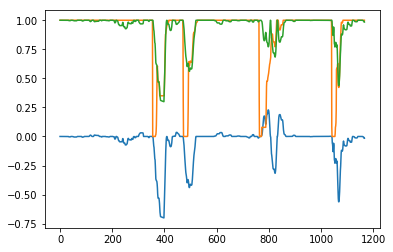

In [345]:
plt.plot([ob['steer_r'] for ob in episode])
plt.plot([ref['Throttle'][ob['ref_id']] for ob in episode])
plt.plot([1 - abs(ob['steer_r']) for ob in episode])

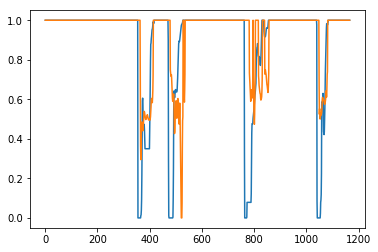

In [374]:
plt.plot([ref['Throttle'][ob['ref_id']] for ob in episode])

speed_y = np.array([abs(ob['speed_y']) for ob in episode])
speed_y[abs(speed_y) < 5] = 0 
thr = np.array([ref['Throttle'][ob['ref_id']] for ob in episode])#np.array([ob['throttle'] for ob in episode])

#plt.plot([ref['Throttle'][ob['ref_id']] for ob in episode])
hat = np.ones(speed_y.shape) - (speed_y * 0.05)
hat[hat<0] = 0
plt.plot(hat)
ax = plt.gca()
#ax2 = plt.twinx()
#ax2.plot([ref['speed_y'][ob['ref_id']] for ob in episode], 'darkorange')

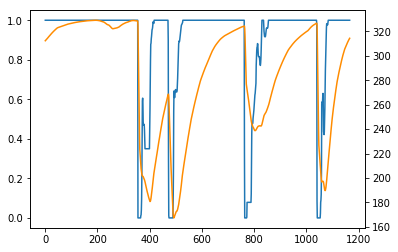

In [350]:
plt.plot([ref['Throttle'][ob['ref_id']] for ob in episode])
ax = plt.gca()
ax2 = plt.twinx()
ax2.plot([ref['speed_x'][ob['ref_id']] for ob in episode], 'darkorange')

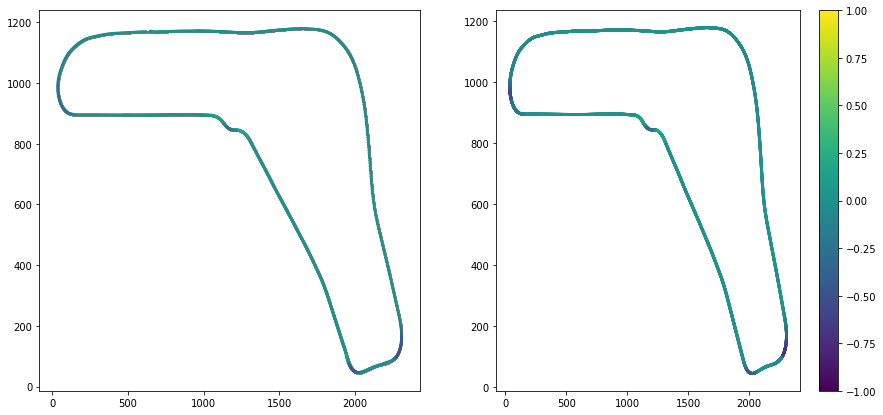

In [259]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in episode]
y = [ob['y'] for ob in episode]
s = [ob['steer'] for ob in episode]
p = ax1.scatter(x, y, c=s, s=4, vmin=-1, vmax=1)
plt.colorbar(p);

ax2.scatter(ref['xCarWorld'], ref['yCarWorld'], c=ref['Steer'], s=4, vmin=-1, vmax=1)

In [117]:
sim = pickle.load(open('../episode_to_check.pkl', 'rb'))
#sim = [sim[i] for i in range(0, len(sim))]

In [118]:
sim[0]['curLapTime']

array(3.348, dtype=float32)

In [119]:
sim[1]['curLapTime']

array(3.358, dtype=float32)

In [120]:
sim[2]['curLapTime']

array(3.368, dtype=float32)

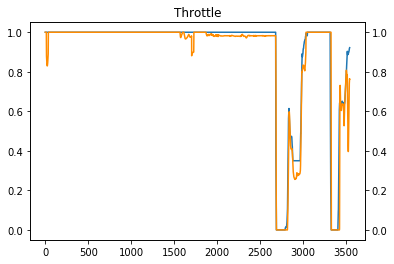

In [97]:
plt.plot([ref['Throttle'][ob['ref_id']] for ob in sim])
ax = plt.gca()
ax2 = plt.twinx()
ax2.plot([ob['throttle'] for ob in sim], 'darkorange')
plt.title('Throttle');

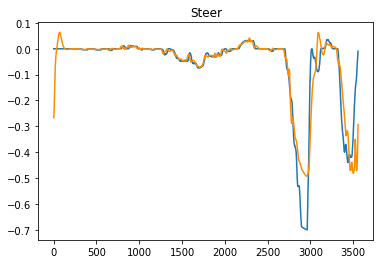

In [90]:
plt.plot([ref['Steer'][ob['ref_id']] for ob in sim])
ax = plt.gca()
ax.plot([ob['steer'] for ob in sim], 'darkorange')
plt.title('Steer');

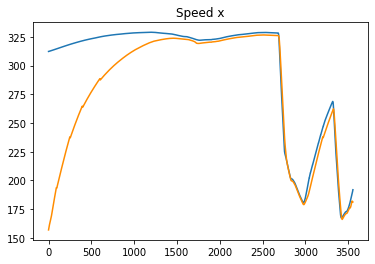

In [91]:
plt.plot([ref['speed_x'][ob['ref_id']] for ob in sim])
ax = plt.gca()
ax.plot([ob['speed_x'] for ob in sim], 'darkorange')
plt.title('Speed x');

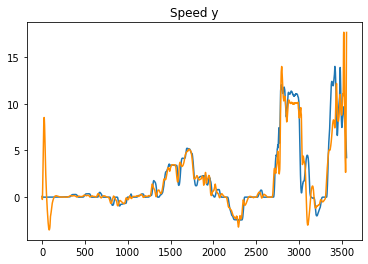

In [92]:
plt.plot([ref['speed_y'][ob['ref_id']] for ob in sim])
ax = plt.gca()
ax.plot([ob['speed_y'] for ob in sim], 'darkorange')
plt.title('Speed y');

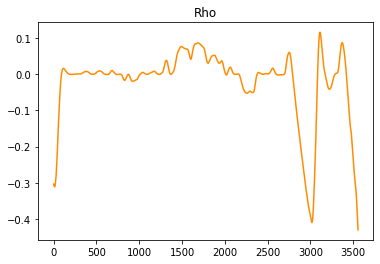

In [93]:
plt.plot([ob['rho'] for ob in sim], 'darkorange')
plt.title('Rho');

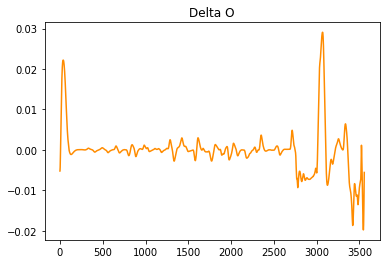

In [94]:
plt.plot([ob['delta_O'] for ob in sim], 'darkorange')
plt.title('Delta O');

In [75]:
[i for i, ob in enumerate(sim) if ob['delta_O'] > 0.5]

[2805,
 2806,
 2807,
 2808,
 2809,
 2810,
 2811,
 2812,
 2813,
 2814,
 2815,
 2816,
 2817,
 2818,
 2819,
 2820,
 2821,
 2822,
 2823,
 2824,
 2825,
 2826,
 2827,
 2828]

In [83]:
def yaw_proj(x0, x1, delta):
    x0 = x0.copy()
    x1 = x1.copy()
    x0_sign = 1 if x0 >= 0 else -1
    x1_sign = 1 if x1 >= 0 else -1
    if abs(x0) > np.pi / 2 and abs(x1) > np.pi / 2 and ((x0_sign * x1_sign) < 0):
        if x0 < 0:
            x0 = 2 * np.pi + x0
        if x1 < 0:
            x1 = 2 * np.pi + x1
    return (1 - delta) * x0 + delta * x1

In [84]:
yaw_proj(ref['yaw'].values[sim[2805]['ref_id']], ref['yaw'].values[sim[2805]['ref_id']+1], sim[2805]['delta'])

-1.577725277058178

In [76]:
sim[2805]['yaw']

array(-1.54354, dtype=float32)

In [77]:
sim[2805]['delta']

0.8194419459856503

In [78]:
ref['yaw'].values[sim[2805]['ref_id']]

-1.572934

In [79]:
ref['yaw'].values[sim[2805]['ref_id']+1]

-1.578781

In [33]:
ref['yaw'].values[sim[3372]['ref_id']] - sim[3372]['yaw']

-0.023724041656494332

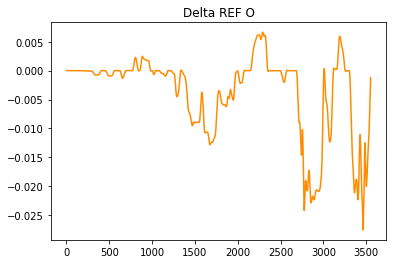

In [21]:
plt.plot([ob['delta_ref_O'] for ob in sim], 'darkorange')
plt.title('Delta REF O');

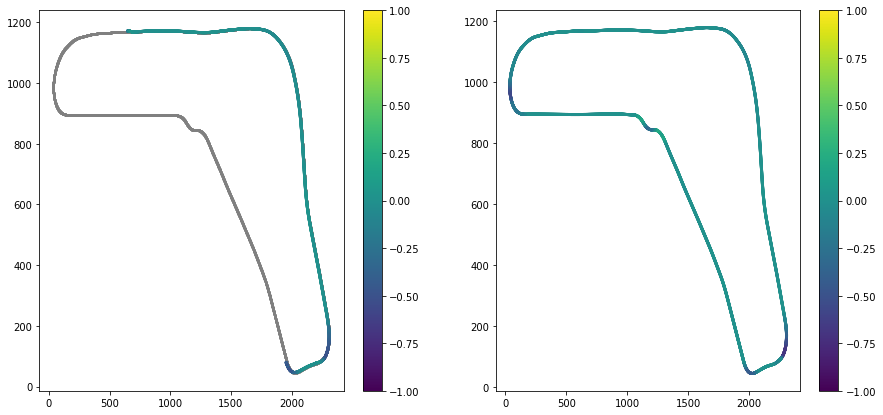

In [28]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2, vmin=-1, vmax=1)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in sim]
y = [ob['y'] for ob in sim]
s = [ob['steer'] for ob in sim]
p = ax1.scatter(x, y, c=s, s=4,  vmin=-1, vmax=1)
plt.colorbar(p, ax=ax1);

p = ax2.scatter(ref['xCarWorld'], ref['yCarWorld'], c=ref['Steer'], s=4,  vmin=-1, vmax=1)
plt.colorbar(p, ax=ax2);

In [418]:
[i for i, s_ in enumerate(s) if s_ > 0]

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 413,
 414,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 467,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516

In [419]:
s[465:470]

[-0.12861419087633838,
 -0.15097166158917133,
 0.11119352230275534,
 -0.19595837785745873,
 -0.21164553866398692]

In [420]:
sim[467]['delta_O']

0.26932215196416537

In [421]:
sim[467]['rho']

0.0823886762456833

In [422]:
sim[467]['delta_ref_O']

-0.020102113976371388

In [99]:
sim[0]['curLapTime']

array(3.348, dtype=float32)

In [100]:
sim[1]['curLapTime']

array(3.358, dtype=float32)

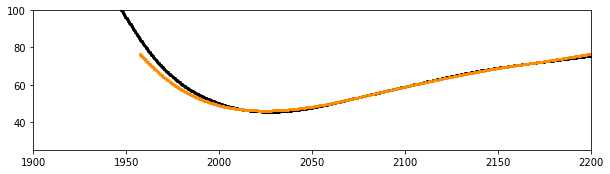

In [116]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(ref['xCarWorld'], ref['yCarWorld'], c='k', s=4)
plt.gca().set_aspect('equal');
plt.xlim([1900, 2200])
plt.ylim([25, 100])
for ob in sim:
    plt.scatter(ob['x'], ob['y'], c='darkorange', s=4)